In [2]:
import os
os.chdir("C:/Users/Komal S Boraste/Downloads/ProjectonTimeSeriesAnalysis/2-Projects/Dataset")
import pandas as pd
ss=pd.read_csv("Super_Store.csv",sep=',',engine='python')

In [3]:
ss.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [4]:
new_ss=ss[['Order Date','Sales']]

In [5]:
new_ss

,Order Date,Sales
0,11/8/2016,261.9600
1,11/8/2016,731.9400
2,10/11/2015,957.5775
3,6/9/2014,48.8600
4,6/9/2014,1706.1840
...,...,...
2116,3/19/2015,383.4656
2117,12/5/2016,13.4000
2118,9/6/2015,85.9800
2119,1/21/2014,25.2480


In [28]:
new_ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  2121 non-null   object 
 1   Sales       2121 non-null   float64
dtypes: float64(1), object(1)
memory usage: 33.3+ KB


In [37]:
new_ss=new_ss.rename({'Order Date':'Order_Date'},axis='columns')

In [38]:
new_ss.columns

Index(['Order_Date', 'Sales'], dtype='object')

In [39]:
new_ss.Order_Date=pd.to_datetime(new_ss.Order_Date,infer_datetime_format=True)

In [40]:
new_ss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2121 entries, 0 to 2120
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order_Date  2121 non-null   datetime64[ns]
 1   Sales       2121 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 49.7 KB


In [41]:
ind_ss=new_ss.set_index(['Order_Date'])

In [42]:
ind_ss.head()

,Sales
Order_Date,
2016-11-08,261.9600
2016-11-08,731.9400
2015-10-11,957.5775
2014-06-09,48.8600
2014-06-09,1706.1840


In [43]:
ind_ss.sort_index()

,Sales
Order_Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,545.940
...,...
2017-12-29,258.750
2017-12-29,1207.840
2017-12-29,101.120


In [84]:
ss_new=ind_ss.groupby('Order_Date').Sales.sum().reset_index()

In [85]:
ss_new

,Order_Date,Sales
0,2014-01-06,2573.8200
1,2014-01-07,76.7280
2,2014-01-10,51.9400
3,2014-01-11,9.9400
4,2014-01-13,879.9390
...,...,...
884,2017-12-24,1393.4940
885,2017-12-25,832.4540
886,2017-12-28,551.2568
887,2017-12-29,2330.7180


In [87]:
ss_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order_Date  889 non-null    datetime64[ns]
 1   Sales       889 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 14.0 KB


In [91]:
ss_new.set_index(['Order_Date'],inplace=True)

In [92]:
ss_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 889 entries, 2014-01-06 to 2017-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   889 non-null    float64
dtypes: float64(1)
memory usage: 13.9 KB


In [93]:
y=ss_new['Sales'].resample('MS').mean()  #MS mean month start

In [123]:
y['2014']

Order_Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049187
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
Freq: MS, Name: Sales, dtype: float64

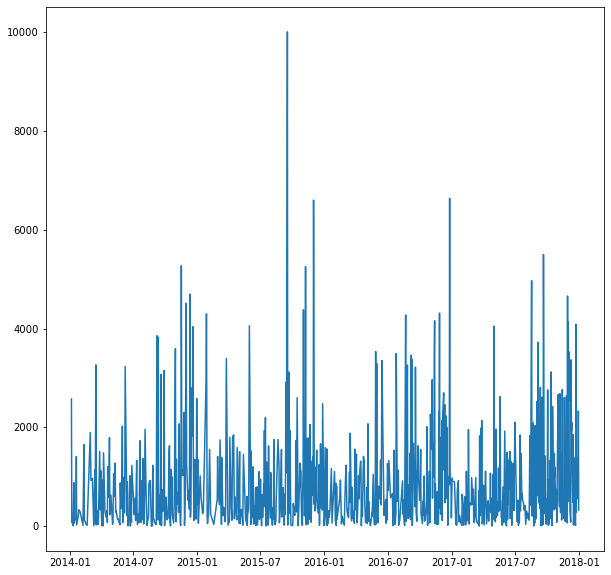

In [97]:
plt.figure(figsize=(10,10))
plt.plot(ss_new);

In [64]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

In [70]:
import matplotlib.pyplot as plt

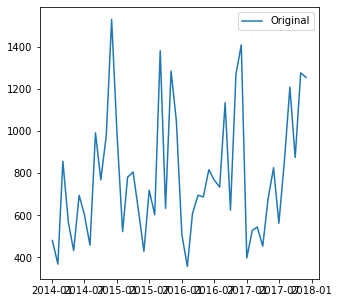

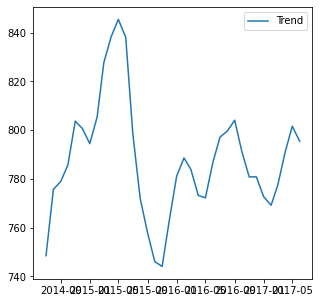

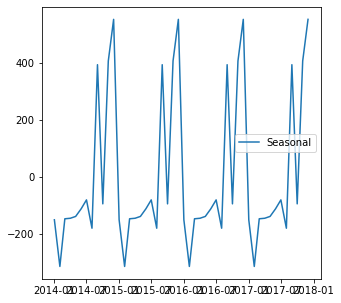

In [124]:
#Decomposing the Time Series into 3 distinct component in trend,seasonality and noise



decomposition = seasonal_decompose(y)
plt.plot(y, label = 'Original')
plt.legend(loc = 'best')


trend  = decomposition.trend
plt.show()
plt.plot(trend, label = "Trend")
plt.legend(loc  = "best")

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

#residual = decomposition.resid
#plt.show()
#plt.plot(residual, label = 'Residual')
#plt.legend(loc = 'best')

In [104]:
auto_arima(y,seasonal=True,m=12)

ARIMA(order=(2, 0, 2), scoring_args={}, seasonal_order=(1, 1, 1, 12),
      suppress_warnings=True)

In [105]:
model_sarima=SARIMAX(y,order=(2,0,2),seasonal_order=(1,1,1,12)) 
results=model_sarima.fit()

C:\Users\Komal S Boraste\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Komal S Boraste\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [109]:
y.tail(12)

Order_Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

In [110]:
pred=results.predict(start=35,end=47)

In [111]:
pred

Order_Date
2016-12-01    1300.886342
2017-01-01     617.379104
2017-02-01     370.944027
2017-03-01     702.935339
2017-04-01     674.232641
2017-05-01     615.745572
2017-06-01     706.500774
2017-07-01     782.153878
2017-08-01     705.295989
2017-09-01    1276.999926
2017-10-01     751.657390
2017-11-01    1227.728907
2017-12-01    1304.330327
Freq: MS, Name: predicted_mean, dtype: float64

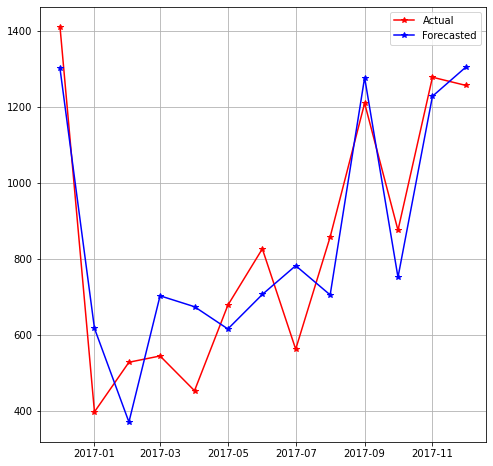

In [113]:
plt.figure(figsize=(8,8))
plt.plot(y[35:48],marker='*',color='r',label='Actual')
plt.plot(pred,marker='*',color='b',label='Forecasted')
plt.legend()
plt.grid()

In [115]:
import numpy as np

In [116]:
#MSE
error=y[35:48]-pred
MSE=np.mean(np.square(error))
MSE

21034.2141537527

In [117]:
RMSE=np.sqrt(MSE)
RMSE

145.03176946363408

In [118]:
# Prediction for future
pred_fut=results.predict(start=48,end=60) # Future Year

In [119]:
pred_fut

2018-01-01     529.845172
2018-02-01     374.350219
2018-03-01     611.066967
2018-04-01     572.368043
2018-05-01     578.271682
2018-06-01     683.719409
2018-07-01     675.064504
2018-08-01     706.852665
2018-09-01    1225.270076
2018-10-01     768.653210
2018-11-01    1264.018283
2018-12-01    1342.545875
2019-01-01     568.574625
Freq: MS, Name: predicted_mean, dtype: float64

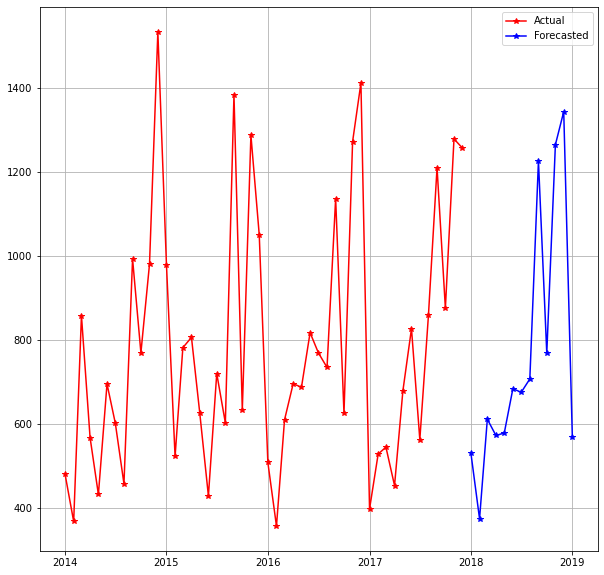

In [121]:
plt.figure(figsize=(10,10))
plt.plot(y,marker='*',color='r',label='Actual')
plt.plot(pred_fut,marker='*',color='b',label='Forecasted')
plt.legend()
plt.grid()